## Observations and Insights 
  
   - The averages of the tumor volumes are very close for most of the regimens except for Capomulin and Ramicane which are around 12 mm3 under the
     average of others regimens.
   - The distribution of female versus male mice was almost 50/50. 49.30 percent for female and 50.7 percent for male.
   - The final tumors for mice treated with Camopulin and Ramicane were much samaler than Infubinol and Ceftamin. For instance, 
     most of the tumor volumes for Ceftamin are between 48.75 mm3 and 64.3 mm3 and for Capomulin between 32.38 mm3 and 40.16 mm3.
   - There was one mouse treated with Infubinol that was out of the range ot the other tumor volumes treated with Infubinol and is 
     an outlier. The value was 36.32 mm3. Most of the tumor volumes for Infubinol were between 54.05 and 65.53.

   

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview5
#mouse_study_combined_df_0 =mouse_study_combined_df.loc[mouse_study_combined_df['Mouse ID'] == 'w150',:]

mouse_study_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

# number of uniques mice
number_of_mice = mouse_study_combined_df['Mouse ID'].unique()
number_of_mice = len(number_of_mice )

#number of the total mice- duplicates codes are included
number_mice_with_duplicates = mouse_study_combined_df['Mouse ID'].count()
print("Total number of mice counting duplicates id's= ",number_mice_with_duplicates)
print("Number of uniques mice=",number_of_mice)

Total number of mice counting duplicates id's=  1893
Number of uniques mice= 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_dup_df = mouse_study_combined_df[mouse_study_combined_df.duplicated(['Mouse ID','Timepoint'])].groupby('Mouse ID')
duplicated_mouse_id = pd.DataFrame({'Duplicate mice':mouse_study_dup_df['Mouse ID'].first()
                                    })
print('Duplicates Mouse ID:')
for i in range(len(duplicated_mouse_id)):
    print (duplicated_mouse_id.index[i])



Duplicates Mouse ID:
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

for i in range(len(duplicated_mouse_id)): 
    if i == 0:
        mouse_id_df             = mouse_study_combined_df.loc[mouse_study_combined_df['Mouse ID' ] == duplicated_mouse_id.index[i],:]                                             
        mouse_all_duplicated_df = mouse_id_df
    else:
        mouse_id_df             = mouse_study_combined_df.loc[mouse_study_combined_df['Mouse ID' ] == duplicated_mouse_id.index[i],:]                                             
        mouse_all_duplicated_df = mouse_all_duplicated_df.append(mouse_id_df, ignore_index=True, sort=False)
mouse_all_duplicated_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
for i in range(len(duplicated_mouse_id)):
    #Dropped the repeated data for the duplicate mouse. I kept the mouse with the other datas with not repeated timepoint
    mouse_study_combined_df = mouse_study_combined_df.drop_duplicates(subset=["Mouse ID",'Timepoint'], keep =  False)
mouse_study_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_combined_df.drop_duplicates(['Mouse ID'])
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean_count = mouse_study_clean_df['Mouse ID'].count()
mouse_study_clean_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Split up the data into groups based upon 'Drug Regimen'
summary_statistics_df = mouse_study_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

#creating a summary dataframe
sumary_df = pd.DataFrame({'Mean':round(summary_statistics_df.mean(),2),
                          'Median':round(summary_statistics_df.median(),2),
                          'Variance':round(summary_statistics_df.var(),2),
                          'StandarDev':round(summary_statistics_df.std(),2),
                          'SEM':round(summary_statistics_df.sem(),2) 
                         })
#output
sumary_df                                                                                                                   

,Mean,Median,Variance,StandarDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = summary_statistics_df.agg(['mean','median','var','std','sem'])
summary_agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

Text(30.25, 0.5, 'Mouse count')

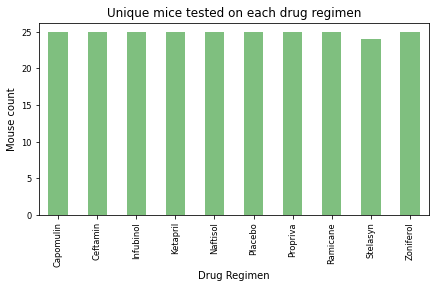

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# number of uniques mice
unique_mice_tested = pd.DataFrame(mouse_study_clean_df.groupby('Drug Regimen')['Mouse ID'].count())
unique_mice_tested.plot(kind="bar",color = 'green',alpha=0.5, align="center", legend = False)
plt.tight_layout()
plt.ylim=(0,30)

# formatted title and labels
plt.yticks(fontsize='small')
plt.xticks(horizontalalignment="center",fontsize='small')
plt.title ('Unique mice tested on each drug regimen')
plt.ylabel("Mouse count")



Text(0.5, 0, 'Drug Regimen')

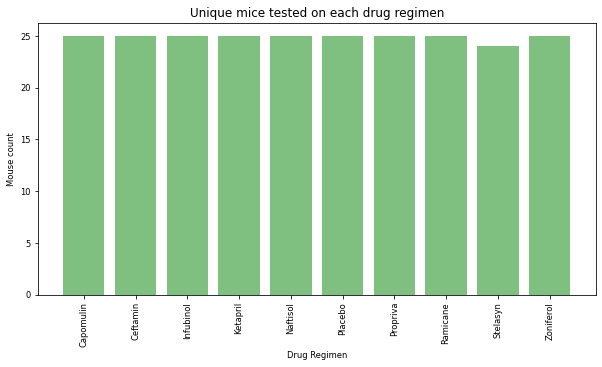

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice_tested_py = pd.DataFrame(mouse_study_clean_df.groupby('Drug Regimen')['Mouse ID'].count()).reset_index()

x_regimen = unique_mice_tested_py['Drug Regimen']
y_count = unique_mice_tested_py['Mouse ID']
plt.figure(figsize=(10,5))
plt.bar(x_regimen,y_count,color='green',alpha=0.5, align='center')

# formatted title and labels
plt.yticks(fontsize='small')
plt.xticks(rotation = 90,horizontalalignment="center",fontsize='small')
plt.title ('Unique mice tested on each drug regimen')
plt.ylabel("Mouse count",fontsize='small')
plt.xlabel("Drug Regimen",fontsize='small')



Text(0.5, 1.0, 'Distribution of female versus male mice')

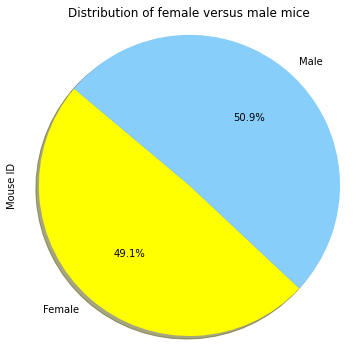

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Generated a DataFrame grouping by sex
show_distribution_bysex =mouse_study_combined_df.groupby('Sex')['Mouse ID'].count()
colors=["yellow", "lightskyblue"]

show_distribution_bysex.plot(kind="pie", colors = colors, figsize=(6,6),autopct='%1.1f%%',shadow=True,startangle=140, legend = False)
plt.axis("equal")
plt.title ('Distribution of female versus male mice')


Text(0.5, 1.0, 'Distribution of female versus male mice')

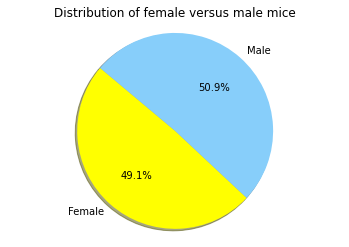

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
show_distribution_bysexpyplot =mouse_study_combined_df.groupby('Sex')['Mouse ID'].count().reset_index()

sex_labels = show_distribution_bysexpyplot['Sex']

# The values of each section of the pie chart
sizes_mousecount = show_distribution_bysexpyplot['Mouse ID']

# The colors of each section of the pie chart
colors = colors=["yellow", "lightskyblue"]

# Create the pie chart 
plt.pie(sizes_mousecount, labels=sex_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title ('Distribution of female versus male mice')

# Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Greatest timepoint for Capomulin
capomulin_greatest = mouse_study_combined_df.loc[mouse_study_combined_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Timepoint']
capomulin_greatest_timepoint =capomulin_greatest.max()

# Calculate the Greatest timepoint for Ramicane
ramicane_greatest = mouse_study_combined_df.loc[mouse_study_combined_df['Drug Regimen'] == 'Ramicane'].groupby('Mouse ID')['Timepoint']
ramicane_greatest_timepoint =ramicane_greatest.max()

# Calculate the Greatest timepoint for Infubinol
infubinol_greatest = mouse_study_combined_df.loc[mouse_study_combined_df['Drug Regimen'] == 'Infubinol'].groupby('Mouse ID')['Timepoint']
infubinol_greatest_timepoint =infubinol_greatest.max()

# Calculate the Greatest timepoint for Ceftamin treatment
ceftamin_greatest = mouse_study_combined_df.loc[mouse_study_combined_df['Drug Regimen'] == 'Ceftamin'].groupby('Mouse ID')['Timepoint']
ceftamin_greatest_timepoint =ceftamin_greatest.max()



In [15]:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_df = pd.merge(capomulin_greatest_timepoint,mouse_study_combined_df,on=['Mouse ID','Timepoint'])
ramicane_df = pd.merge(ramicane_greatest_timepoint,mouse_study_combined_df,on=['Mouse ID','Timepoint'])
infubinol_df = pd.merge(infubinol_greatest_timepoint,mouse_study_combined_df,on=['Mouse ID','Timepoint'])
ceftamin_df = pd.merge(ceftamin_greatest_timepoint,mouse_study_combined_df,on=['Mouse ID','Timepoint'])


In [16]:
# created dataframe with the tumor volume list for each regimen
capomulin_vol_list = capomulin_df['Tumor Volume (mm3)']
ramicane_vol_list =  ramicane_df['Tumor Volume (mm3)']
infunol_vol_list = infubinol_df['Tumor Volume (mm3)']
ceftamin_vol_list = ceftamin_df['Tumor Volume (mm3)']

#tumor_volume_list = treatment_regimens_data_df['Tumor Volume (mm3)']


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin IQR and potencial outliers
quartiles_ca = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ca = quartiles_ca[0.25]
upperq_ca = quartiles_ca[0.75]
iqr_ca = upperq_ca-lowerq_ca

#Calculates Capomulin outliers using upper and lower bounds
lower_bound_ca = lowerq_ca - (1.5*iqr_ca)
upper_bound_ca = upperq_ca + (1.5*iqr_ca)

# print Capomulin IQR and potencial outliers
print('- Capomulin IQR and potencial outliers')
print(f"Lower quartile: {round(lowerq_ca,2)}")
print(f"Upper quartile: {round(upperq_ca,2)}")
print(f"Interquartile range: {round(iqr_ca,2)}")
print(f"The Median: {round(quartiles_ca[0.5],2)} ")
print(' ')

# Print outliers using upper and lower bounds
print(f"Capomulin lower bound outlier: {round(lower_bound_ca,2)}")
print(f"Capomulin upper bound outlier: {round(upper_bound_ca,2)}")

- Capomulin IQR and potencial outliers
Lower quartile: 32.38
Upper quartile: 40.16
Interquartile range: 7.78
The Median: 38.13 
 
Capomulin lower bound outlier: 20.7
Capomulin upper bound outlier: 51.83


In [18]:
#Ramicane IQR and potencial outliers
quartiles_ra = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ra = quartiles_ra[0.25]
upperq_ra = quartiles_ra[0.75]
iqr_ra = upperq_ra-lowerq_ra

# Calculates Ramicane outliers using upper and lower bounds
lower_bound_ra = lowerq_ra - (1.5*iqr_ra)
upper_bound_ra = upperq_ra + (1.5*iqr_ra)

# print Ramicane IQR and potencial outliers
print('- Capomulin IQR and potencial outliers')
print(f"Lower quartile: {round(lowerq_ra,2)}")
print(f"Upper quartile: {round(upperq_ra,2)}")
print(f"Interquartile range: {round(iqr_ra,2)}")
print(f"The Median: {round(quartiles_ra[0.5],2)} ")
print(' ')

# Print outliers using upper and lower bounds
print(f"Ramicane lower bound outlier: {round(lower_bound_ra,2)}")
print(f"Ramicane upper bound outlier: {round(upper_bound_ra,2)}")

- Capomulin IQR and potencial outliers
Lower quartile: 31.56
Upper quartile: 40.66
Interquartile range: 9.1
The Median: 36.56 
 
Ramicane lower bound outlier: 17.91
Ramicane upper bound outlier: 54.31


In [19]:
#Infubinol IQR and potencial outliers
quartiles_in = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_in = quartiles_in[0.25]
upperq_in = quartiles_in[0.75]
iqr_in = upperq_in-lowerq_in

#Calculates Infubinol outliers using upper and lower bounds
lower_bound_in = lowerq_in - (1.5*iqr_in)
upper_bound_in = upperq_in + (1.5*iqr_in)

# print Infubinol IQR and potencial outliers
print('- Infubinol IQR and potencial outliers')
print(f"Lower quartile: {round(lowerq_in,2)}")
print(f"Upper quartile: {round(upperq_in,2)}")
print(f"Interquartile range: {round(iqr_in,2)}")
print(f"The Median: {round(quartiles_in[0.5],2)} ")
print(' ')

# Print outliers using upper and lower bounds
print(f"Infubinol lower bound outlier: {round(lower_bound_in,2)}")
print(f"Infubinol upper bound outlier: {round(upper_bound_in,2)}")



- Infubinol IQR and potencial outliers
Lower quartile: 54.05
Upper quartile: 65.53
Interquartile range: 11.48
The Median: 60.17 
 
Infubinol lower bound outlier: 36.83
Infubinol upper bound outlier: 82.74


In [20]:
#Ceftamin IQR and potencial outliers
quartiles_ce = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ce = quartiles_ce[0.25]
upperq_ce = quartiles_ce[0.75]
iqr_ce = upperq_ce-lowerq_ce

#Calculates Ceftamin outliers using upper and lower bounds
lower_bound_ce = lowerq_ce - (1.5*iqr_ce)
upper_bound_ce = upperq_ce + (1.5*iqr_ce)

print('- Ceftamin IQR and potencial outliers')
print(f"Lower quartile: {round(lowerq_ce,2)}")
print(f"Upper quartile: {round(upperq_ce,2)}")
print(f"Interquartile range: {round(iqr_ce,2)}")
print(f"The Median: {round(quartiles_ce[0.5],2)} ")
print(' ')

# Print outliers using upper and lower bounds
print(f"Ceftamin lower bound outlier: {round(lower_bound_ce,2)}")
print(f"Ceftamin upper bound outlier: {round(upper_bound_ce,2)}")


- Ceftamin IQR and potencial outliers
Lower quartile: 48.72
Upper quartile: 64.3
Interquartile range: 15.58
The Median: 59.85 
 
Ceftamin lower bound outlier: 25.36
Ceftamin upper bound outlier: 87.67


Text(0, 0.5, 'Tumor Volume (mm3)')

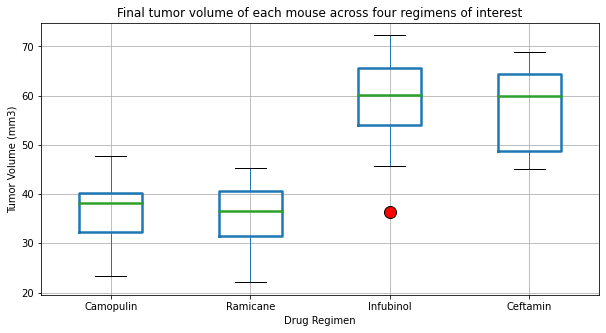

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_tumor_volume_df = pd.DataFrame({'Camopulin':capomulin_vol_list,
                                     'Ramicane':ramicane_vol_list,
                                     'Infubinol':infunol_vol_list,
                                     'Ceftamin':ceftamin_vol_list
                                    })

boxprops = dict(linestyle='-',linewidth=2.5)

flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-', linewidth=2.5, color='blue')
plt.figure(figsize=(10,5))
plot_tumor_volume_df.boxplot(column=["Camopulin", "Ramicane",'Infubinol','Ceftamin'],flierprops=flierprops, medianprops=medianprops,
                            boxprops=boxprops)
plt.title('Final tumor volume of each mouse across four regimens of interest')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')


## Line and Scatter Plots

Text(0, 0.5, 'Weight (g)')

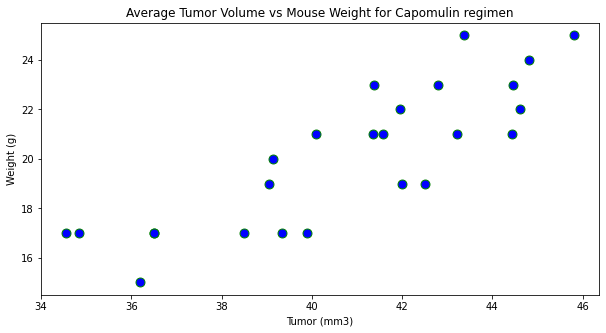

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_tumor_x =  mouse_study_combined_df.loc[mouse_study_combined_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')
capomulin_avg_x = capomulin_tumor_x.mean()

capomulin_tumor_avg = capomulin_avg_x['Tumor Volume (mm3)']
capomulin_weight = capomulin_avg_x['Weight (g)']
plt.figure(figsize=(10,5))
plt.scatter(capomulin_tumor_avg, capomulin_weight, marker="o", facecolors="blue", edgecolors="green",s=80)

# Create a title, x label, and y label for our chart
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin regimen")
plt.xlabel("Tumor (mm3)")
plt.ylabel("Weight (g)")


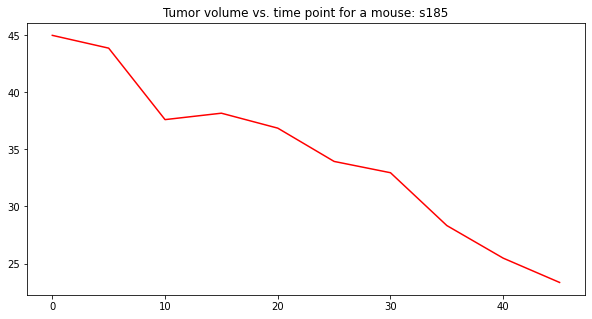

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Crete a dataframe with the Drug Regimen 'Capomulin'
capomulin_lineplot_df = mouse_study_combined_df.loc[mouse_study_combined_df['Drug Regimen']=='Capomulin']

#create a list of all the Mouse treated with Capomulin
capomulin_list = []
capomulin_list = capomulin_lineplot_df['Mouse ID'].unique()

#created a variable for the fisrt mouse on the list,this is to generate the  graph for this mouse.
v_mouse_id = capomulin_list[0]

#Created a line plot for tumor volume vs. time point for one mouse
capomulin_lineplot = capomulin_lineplot_df.loc[capomulin_lineplot_df['Mouse ID']==v_mouse_id]
timepoint_y = capomulin_lineplot['Timepoint']
capomulin_vol_x =  capomulin_lineplot['Tumor Volume (mm3)']
plt.figure(figsize=(10,5))
line_tumor_volume, =  plt.plot(timepoint_y,capomulin_vol_x, color="red")
    
plt.title('Tumor volume vs. time point for a mouse: '+ str(v_mouse_id) )
plt.show()
    
    

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient between mouse weight and average tumor volume
weight = capomulin_weight
volume = capomulin_tumor_avg
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# linear regresion for mouse weight and average tumor volume
linear_regresion = st.linregress(weight, volume)
print(linear_regresion)


The correlation between both factors is 0.84
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


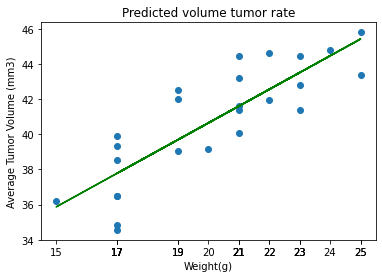

In [34]:
# Perform a linear regression on mouse weight vs average tumor volume
tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(weight, volume)

# Create equation of line to calculate predicted volume tumor rate
tv_fit = tv_slope * weight + tv_int
plt.scatter(weight,volume)

plt.plot(weight,tv_fit,color='green')
plt.xticks(weight)
plt.title('Predicted volume tumor rate')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('LrMouseWeightvsAvgTumorVol')
plt.show()
